## Guided Project: Clean and Analyze Employee Exit Surveys
### *By: Naftali N Indongo*

### 1. Introduction

In this guided project, I will work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. Some slight modifications to the original datasets has been made to make them easier to work with, including changing the encoding to <font color='red'>UTF-8</font> (the original ones are encoded using <font color='red'>cp1252</font>.)

In this project, I will play the role of a data analyst and pretend the stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want me to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. The guided steps, aim to do most of the data cleaning and get me started analyzing the first question.

Since a data dictionary wasn't provided with the dataset. In a job setting, I will make sure to meet with a manager to confirm the definitions of the data. For this project, I will use my general knowledge to define the columns.

Below is a preview of a couple columns I will work with from the <font color='red'>dete_survey.csv</font>:

* <font color ='red'>ID</font>: An id used to identify the participant of the survey
* <font color ='red'>SeparationType</font>: The reason why the person's employment ended
* <font color ='red'>Cease Date</font>: The year or month the person's employment ended
* <font color ='red'>DETE Start Date</font>: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the <font color='red'>tafe_survey.csv</font>:

* <font color ='red'>Record ID</font>: An id used to identify the participant of the survey
* <font color ='red'>Reason for ceasing employment</font>: The reason why the person's employment ended
* <font color ='red'>LengthofServiceOverall. Overall Length of Service at Institute (in years)</font>: The length of the person's employment (in years)

I will start by reading the datasets into pandas and exploring them.

In [917]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [918]:
# Using pandas to read in the datasets
"""
I will use the pd.read_csv() function to specify values that 
should be represented as NaN and fix the missing values first.
"""
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
tafe_survey = pd.read_csv("tafe_survey.csv")

I will use the <font color ='red'>DataFrame.info()</font> and <font color = 'red'>DataFrame.head()</font> methods to print information about both dataframes, as well as the first few rows. Furthermore, I will use the <font color ='red'>Series.value_counts()</font> and <font color ='red'>DataFrame.isnull()</font> methods to explore the data and figure out some next steps.

In [919]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [920]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [921]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [922]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [923]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [924]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


From the <font color ='red'>DataFrame.info()</font>, <font color = 'red'>DataFrame.head()</font> and <font color = 'red'>DataFrame.isnull()</font> methods the we will dediduce the following:
* The <font color ='red'>dete_survey</font> dataset has 822 rows and 56 columns with datatypes : <font color='red'>Int64</font>, <font color='red'>float64</font>, <font color='red'>Object/Strings</font> and <font color='red'>Boolians</font>, while the <font color ='blue'>tafe_survey</font> 
has 702 rows and 72 columns with <font color='red'>float64</font> and <font color='red'>Object/Strings</font> datatypes.
* Both dataframes contain many columns that we don't need to complete our analysis.
* The <font color ='red'>dete_survey</font> dataframe contains <font color ='red'>'Not Stated'</font> values that indicates values are missing, but they are not represented as <font color ='red'>NaN</font>
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### 2. Identifying Missing Values and Drop Unnecessary Columns

From the work in the previous screen, I will start by handling the firts two issues. The <font color ='red'>pd.read_csv</font> [funtion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) can be used to specify values that should be represented as <font color='red'>NaN</font>. I will use this function to fix the missing values first. Then, drop columns we do not need for the analysis. 

In [925]:
# Dropping columns from the dete_survey dataframe that are not needed for the analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49]
                                       , axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [926]:
# Dropping columns from the tafe_survey dataframe that are not needed for the analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66]
                                       , axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

### 3. Clean Column Names

Now, I will turn my attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:


dete_survey|tafe_survey|Definition
:---------|:----------|:-------------------------|
ID|Record ID|An id used to identify the participant of the survey       
SeparationType|Reason for ceasing employment	|The reason why the participant's employment ended|
Cease Date|	CESSATION YEAR |	The year or month the participant's employment ended|
DETE Start Date|		|The year the participant began employment with the DETE|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)	|The length of the person's employment (in years)|
Age| CurrentAge. Current Age |The age of the participant|
Gender	|Gender. What is your Gender?|	The gender of the participant|





Since I want to combine the dataset, then I have to standardize the column names. The <font color ='red'>DataFrame.columns</font> attribute will be used along with vectorized string methods to update all of the columns at once.

In [927]:
# Renaming remaining columns in the dete_survey_updated dataframe.
dete_survey_updated.columns= dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [928]:
#Creatig a mapping dictionary
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
#Using the mapping dictionary to update the column names in the tafe_survey_updated dataframe
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

In [929]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [930]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


1. The columns in the <font color='red'>dete_survey_updated </font> dataframe were renamed as follow:
* Using the following criteria to update the column names:
  - Make all the capitalization lowercase.
  - Remove any trailing whitespace from the end of the strings.
  - Replace spaces with underscores ('_').
* As an example, Cease Date should be updated to cease_date.

2. The <font color ='red'>Dataframe.rename()</font> method was used to update the columns in the <font color='red'>tafe_survey_updated </font> by using a mapping dictionary with the following keys:
* 'Record ID': 'id'
* 'CESSATION YEAR': 'cease_date'
* 'Reason for ceasing employment': 'separationtype'
* 'Gender. What is your Gender?': 'gender'
* 'CurrentAge. Current Age': 'age'
* 'Employment Type. Employment Type': 'employment_status'
* 'Classification. Classification': 'position'
* 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
*'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    
The columns to be used in our analysis were renamed for better understanding.

### 4. Filter the Data

In the last screen, I renamed the columns that will be used in the analysis. Next, I will remove more of the data we don't need.

Recall that the end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Looking at the unique values in the <font color ='red'>separationtype</font> columns in each dataframe, you will see that each contains a couple of different separation types. For this project, I will only analyze survey respondents who resigned, so their separation type contains the string <font color='red'>'Resignation'</font>.

The <font color ='red'>dete_survey_updated</font> dataframe contains multiple separation types with the string 'Resignation':
* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

All these variations have to be accounted for do that no data will be dropped unintetionally!

We will use the <font color ='red'>Series.value_counts()</font> [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to review the unique values in the <font color='red'>separationtype</font> column in both <font color='red'>dete_survey_updated</font> and <font color='red'>tafe_survey_updated</font>.

In [931]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation is the major reason people exit the company at the Department of Education, Training and Employment with a total of 311 employees. 150 employees resigned because of other reasons, 91 resigned because they got other employer and 70 resigned because they moved overseas or interstate.

In [932]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Resignation is also the major reason people exit the company at the Technical and Further Education (TAFE) institute in Queensland, Australia with a total of 340 employees. 

Before selecting only the data for survey respondents who have a <font color='red'>Resignation</font> separation types, all separation types containing the word 'Resignation' in the <font color ='red'>dete_survey_updated</font> have to be updated to only the string <font color ='red'>'Resignation'</font>. e.g <font color='blue'>'Resignation-Other reasons'</font> becomes <font color='red'>'Resignation'</font>.

In [933]:
dete_survey_updated['separationtype']= dete_survey_updated['separationtype'].str.split('-').str[0]

#check if the resignationtype column is updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Now, I will select only the data for survey who have <font color='red'>Resignation</font> separationtype in each dataframe.

In [934]:
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

We have only selected the rows where employees have resigned because that is the only data relevant to answer the given questions.

### 5. Verify the Data

Now, before I start cleaning and manipulating the rest of the data, I will verify that the data doesn't contain any major inconsistencies (to the best of my knowledge). 

In this step, I will focus on verifying that the years in the <font color='red'>cease_date</font> and <font color='red'>dete_start_date</font> columns make sense. 

* Since the <font color='red'>cease_date</font> is the last year of the person's employment and the <font color='red'>dete_start_date</font> is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the <font color='red'>dete_start_date</font> was before the year 1940.

If I have many years higher than the current date or lower than 1940, I wouldn't want to continue with my analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

below, I will check the years in each dataframe for logical consistencies

In [935]:
#1) Checking cease_date in dete_resignations
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

I will use the vectorized method to extract the years and use the <font color='red'>Series.astype()</font> method to convert the type to float.

In [936]:
# 1) Converting cease_date in dete_resignations
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Confirming if the code did what I expected
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [937]:
#2 Checking dete_start_date in dete_resignations
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [938]:
#3 Checking cease_date in tafe_resignations
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [939]:
# Checking for unique values
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [940]:
dete_dates = dete_resignations[['dete_start_date', 'cease_date']]

fig = px.box(dete_dates, y=dete_dates.columns, width=500, height=500, template='plotly_white')
fig.update_layout(title='DETE Resignations: Start Date and Cease Date')
fig.update_yaxes(dtick=5, color='gray', title='Year', showline=True, mirror=True)
fig.update_xaxes(title='', color='gray', showline=True, mirror=True)

fig.show()

From box plot above we observe that the majority of the employees who resigned joined the DETE between the late 1997 and 2010. Between year 2010 and 2014, a large proportion of these employees had resigned from the institution.

##### Looking at the years in each dataframe, it seems there are no logical inconsistencies.

### 6. Create a New Column

Now that I have verified the years in the <font color ='red'>dete_resignations</font> dataframe, I will use them to create a new column. Recall that the end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

Since the <font color ='red'>tafe_resignations</font> dataframe already contains a "service" column, which we renamed to <font color ='red'>institute_service</font>, then I have to create a corresponding <font color ='red'>institute_service</font> column in <font color='red'>dete_resignations</font> in order to analyze both surveys together.

In [941]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

#checking for values
dete_resignations['institute_service'].shape

(311,)

The <font color ='red'>institute_service</font> in the <font color ='red'>dete_resignations</font> dataframe was created by subtracting the <font color='red'>dete_start_date</font> from the <font color='red'>cease_date</font> column. This is the column I will use to analyze survey respondents according to their length of employment.

### 7. Identify Dissatisfied Employees

Next, I will identify any employees who resigned because they were dissatisfied.

Below are the columns I will use to categorize employees as "dissatisfied" from each dataframe. 

1. tafe_survey_updated:
   * <font color ='red'>Contributing Factors. Dissatisfaction</font>
   * <font color ='red'>Contributing Factors. Job Dissatisfaction</font>

2. dete_survey_updated:
   * <font color ='red'>job_dissatisfaction</font>
   * <font color ='red'>dissatisfaction_with_the_department</font>
   * <font color ='red'>physical_work_environment</font>
   * <font color ='red'>lack_of_recognition</font>
   * <font color ='red'>lack_of_job_security</font>
   * <font color ='red'>work_location</font>
   * <font color ='red'>employment_conditions</font>
   * <font color ='red'>work_life_balance</font>
   *<font color ='red'> workload</font>
   

If the employee indicated any of the factors above caused them to resign, I will mark them as dissatisfied in a new column.

In [942]:
# Checking for Unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

Only 55 employees resigned because they were dissatisfied.

In [943]:
# Checking for Unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Only 62 employees resigned because they were dissatisfied with the job.

The function below will update values in <font color='red'>'Contributing Factors. Dissatisfaction'</font> and <font color='red'>'Contributing Factors. Job Dissatisfaction'</font> in the <font color='red'>tafe_resignations</font> dataframes so that each contain only <font color='red'> True</font>, <font color='red'>False</font> or <font color='red'>NaN</font> values.

In [944]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [945]:
# Applying the function to update values in the tafe_resignation dataframe.
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis =1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()

In [946]:
# Checking for unique vales
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [947]:
# Applying the function to update values in the dete_resignation dataframe.
dete_resignations['dissatisfied']=dete_resignations[['job_dissatisfaction',
        'dissatisfaction_with_the_department', 'physical_work_environment',
        'lack_of_recognition', 'lack_of_job_security', 'work_location', 
        'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [948]:
# Checking for unique vales
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

### 8. Combining the Data

Now, I am finally ready to combine the datasets! The end goal is to aggregate the data according to the <font color='red'>institute_service</font> column.

First, I will add a column to each dataframe that will allow me to easily distinguish between the two.

In [949]:
dete_resignations_up['institution']='DETE'
tafe_resignations_up['institution']='TAFE'

In [950]:
# Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verifying the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

Below I will drop all columns with less than 500 non null values.

In [951]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institution          651
dtype: int64

Now I am are only left with 9 columns which are relevant for the analysis.

### 9. Cleaning the Services Column

Now that I have combined the dataframes, I am almost at a place where I can perform some kind of analysis! First, though, I have to clean up the <font color ='red'>institute_service</font> column. This column is tricky to clean because it currently contains values in a couple different forms.

To analyze the data, I will convert these numbers into categories. I will base my analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

I will use the slightly modified definitions below:
   * New: Less than 3 years at a company
   * Experienced: 3-6 years at a company
   * Established: 7-10 years at a company
   * Veteran: 11 or more years at a company
   
I will categorize the values in the institute_service column using the definitions above.

In [952]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
22.0                   6
12.0                   6
14.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


Below I will extract the years of service for each value in the <font color='red'>institution_service</font> column  and convert the type to float.

In [953]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

In [954]:
#Checking for unique values
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

Now, I will create a function that maps each year value to one of the career stages above.

In [955]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif 3<=val<=6:
        return 'Experienced'
    elif 7<=val<=10:
        return 'Established'
    else:
        return 'Veteran'

In [956]:
# Applying the function to map each year value to one of the career stages above
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)

# Confirming the function did what I expected.
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

From the code above I created a <font color='red'>service_cat</font> column, that categorizes employees according to the number of years they spend at the componey: One can deduce that there are 193 New employees, 172 experienced employees, 62 established employees and 136 veteran employees. There are 88 missing values.

### 10. Performing the Initial Analysis

Now, I will finally do the first piece of analysis! I will fill in missing values in the <font color='red'>dissatisfied</font> column and then aggregate the data to get started, but there are still additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

I will use the <font color='red'>Series.value_counts()</font> method to confirm if the number of <font color='red'>True</font> and <font color='red'>False</font> in the <font color='red'>dissatisfied</font> column. I will set the <font color='red'>dropna</font> parameter to <font color='red'>False</font> to also confirm the number of missing values.

In [957]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [958]:
# Replacing the missing values with the most frequentely occuring value in the column. 
# in this case, the most frequent value is False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

I use the <font color='red'>DataFrame.pivot_table()</font> to calculate the percentage of dissatisfied employees in each service_cat group.

In [959]:
dissatisfied_resignations = combined_updated.pivot_table(values='dissatisfied', index = 'service_cat')
dissatisfied_resignations

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


Doing a the analysis between service category and dissatisfied employees, I observe that 51.61% of the employees who resigned from the DETE and TAFE were established (worked for 7-10 years), 34.3% were experienced (worked for 3-7 years), 29.53% were newbies (worked for less than 3 years) and 48.53% were veterans (worked for 11 years or more). One can infer that people that work in the DETE and TAFE institute become dissatisfied with their jobs due to some challenges they are faced.

In [960]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
dissatisfied_resignations['dissatisfied']=dissatisfied_resignations['dissatisfied']*100

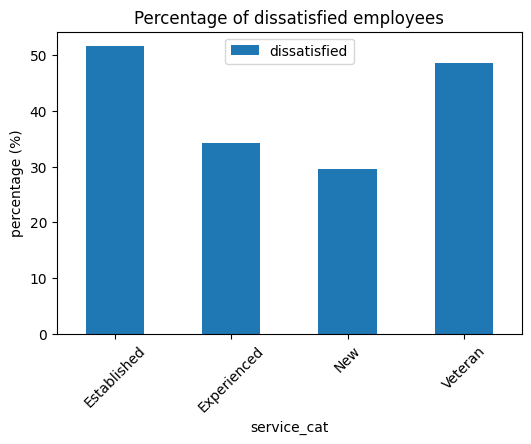

In [961]:
# Plotting the results
dissatisfied_resignations.plot(kind='bar', rot=45)
plt.ylabel('percentage (%)')
plt.title('Percentage of dissatisfied employees')
plt.show()

From the bar graph above, I can dedude that established employees are more likely to resign due to some dissatisfications. New employees are least likely to resign.

### 10. Cleaning the Age Column

To turn back to our initial question: How many people in each age group resgined due to some kind of dissatisfaction? Instead of analyzing the survey results together, analyze each survey separately. 

Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [962]:
# Checking for unique values in the age column
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
Name: age, dtype: int64

In [963]:
# Extracting the dataset for employees who only indicated True in the dissatisfied column
combined_dissatisfied = combined_updated.loc[combined_updated['dissatisfied']==True,]

In [964]:
# cleaning the age column
combined_updated['age'] = combined_updated['age'].str.replace("  ","-")
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      29
56-60            26
61 or older      23
Name: age, dtype: int64

Looking at the <font color='red'>age</font> column, I notice some incinsisitencies in some age categories. 56 or older, 56-60 and 61 or older seems odd, therefore need cleaning. We will use the function below to haddle that issue.

In [965]:
def clean_age(element):
    if element == "56-60" or element == "61 or older":
        return "56 or older" 
    else:
        return element

# Applying the function to clean the age column.
combined_updated['age'] = combined_updated['age'].map(clean_age)


In [966]:
# Checking for unique values
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
NaN              55
Name: age, dtype: int64

Since we have cleaned up the <font color='red'>age</font>, now we can see if there is a relationship between <font color='red'>age</font> and employees resigning due to some kind of dissatisfication. I will first filter the dataset to only employees who indicated <font color='red'>True</font> in the <font color='red'>dissatisfied</font> column

In [967]:
combined_dissatisfied = combined_updated[combined_updated['dissatisfied']==True]

I will create a dataframe with age groups counts, number of dissatisfied people per age group and their respective percentages.

In [968]:
Age_DF = combined_updated['age'].value_counts().sort_index().to_frame(name='Total')
Age_DF['Dissatisfied'] = combined_dissatisfied ['age'].value_counts().sort_index()
Age_DF['Dissatisfied (%)'] = round(Age_DF['Dissatisfied'] / Age_DF['Total'],4)*100
Age_DF.index.name = 'Age'                                                           
Age_DF

,Total,Dissatisfied,Dissatisfied (%)
Age,,,
20 or younger,10,2,20.00
21-25,62,19,30.65
26-30,67,28,41.79
31-35,61,23,37.70
36-40,73,25,34.25
41-45,93,35,37.63
46-50,81,31,38.27
51-55,71,30,42.25
56 or older,78,33,42.31


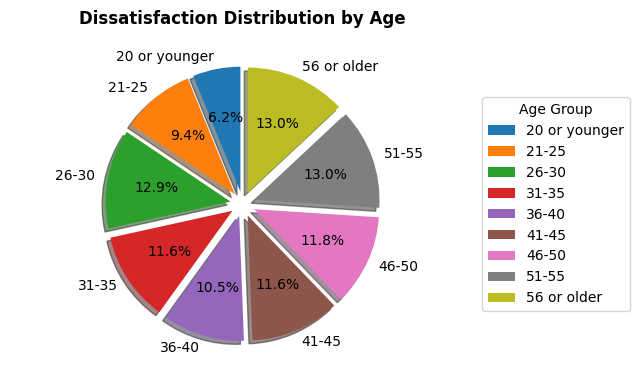

In [969]:
labels = ['20 or younger','21-25','26-30','31-35', '36-40','41-45','46-50','51-55','56 or older' ]


sizes = [15, 30, 45, 10]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(Age_DF['Dissatisfied (%)'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels, title="Age Group",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Dissatisfaction Distribution by Age\n", weight ='bold')
plt.show()

From the dissatisfaction distribution by age pie chart, one can deduce that older employees (51-55 years and 56 years or older) are the most likely to resign due to dissatisfications (42.25% and 42.31% respectively) than younger employees, with the exception of 26-30 year olds.